In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

os.makedirs("ds_thrinesh/csv_files", exist_ok=True)
os.makedirs("ds_thrinesh/outputs", exist_ok=True)



In [52]:

trades_path = "/content/historical_data.csv"
sentiment_path = "/content/fear_greed_index.csv"

df_trades = pd.read_csv(trades_path)
df_sentiment = pd.read_csv(sentiment_path)

print("Data Loaded Successfully")
print("Trades shape:", df_trades.shape)
print("Sentiment shape:", df_sentiment.shape)



Data Loaded Successfully
Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


In [53]:

sentiment_col = None

for col in df_sentiment.columns:
    if 'fear' in col.lower() or 'greed' in col.lower() or 'class' in col.lower():
        sentiment_col = col
        break

print("Using column:", sentiment_col)

df_sentiment['Sentiment'] = df_sentiment[sentiment_col].apply(
    lambda x: 'Fear' if 'Fear' in str(x) else 'Greed'
)
date_col = None
for col in df_sentiment.columns:
    if 'date' in col.lower():
        date_col = col
        break

print("Using date column:", date_col)

df_sentiment['Date'] = pd.to_datetime(df_sentiment[date_col], errors='coerce').dt.date
timestamp_col = None
for col in df_trades.columns:
    if 'time' in col.lower():
        timestamp_col = col
        break

print(" Using Timestamp column:", timestamp_col)

df_trades['Timestamp IST'] = pd.to_datetime(df_trades[timestamp_col], errors='coerce')
df_trades['Date'] = df_trades['Timestamp IST'].dt.date
merged = pd.merge(
    df_trades,
    df_sentiment[['Date', 'Sentiment']],
    on='Date',
    how='inner'
)

print("MERGE SUCCESSFUL")
print(merged.head())




Using column: classification
Using date column: date
 Using Timestamp column: Timestamp IST
MERGE SUCCESSFUL
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.4885

In [54]:
merged.to_csv("ds_thrinesh/csv_files/final_merged_data.csv", index=False)

print("final_merged_data.csv saved successfully (GitHub safe)")


final_merged_data.csv saved successfully (GitHub safe)


In [55]:
best_traders = (
    merged.groupby('Account')['Closed PnL']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

best_traders.to_csv("ds_thrinesh/csv_files/best_traders.csv", index=False)

print("best_traders.csv created")
best_traders


best_traders.csv created


,Account,Closed PnL
0,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.478495e+06
1,0x083384f897ee0f19899168e3b1bec365f52a9012,9.655887e+05
2,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2.056523e+05
3,0xbaaaf6571ab7d571043ff1e313a9609a10637864,2.013539e+05
4,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1.972949e+05
5,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,1.425837e+05
6,0x513b8629fe877bb581bf244e326a047b249c4ff1,6.054430e+04
7,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,5.853488e+04
8,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,4.509997e+04
9,0x2c229d22b100a7beb69122eed721cee9b24011dd,4.304078e+04


In [56]:
worst_trades = merged.sort_values(by='Closed PnL').head(10)

worst_trades.to_csv("ds_thrinesh/csv_files/worst_trades.csv", index=False)

print("worst_trades.csv created")
worst_trades[['Account','Coin','Closed PnL']]


worst_trades.csv created


,Account,Coin,Closed PnL
1217,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,-117990.10410
1779,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,-19841.24014
1225,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,-18849.96767
4719,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,-18360.67007
4703,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,-18148.47621
4740,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,-18011.33336
4689,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,-17937.47276
4713,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,-17413.20000
35530,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,@107,-17323.49327
1771,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,-16503.40731


In [57]:
coin_profit = (
    merged.groupby('Coin')['Closed PnL']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

coin_profit.to_csv("ds_thrinesh/csv_files/coin_profit.csv", index=False)

print("coin_profit.csv created")
coin_profit.head(10)


coin_profit.csv created


,Coin,Closed PnL
0,@107,1.449482e+06
1,SOL,9.916105e+05
2,HYPE,5.320252e+05
3,ENA,1.600584e+05
4,BTC,1.041474e+05
5,USUAL,6.076586e+04
6,ETH,5.056384e+04
7,kBONK,2.967982e+04
8,MELANIA,1.978988e+04
9,ME,1.731369e+04


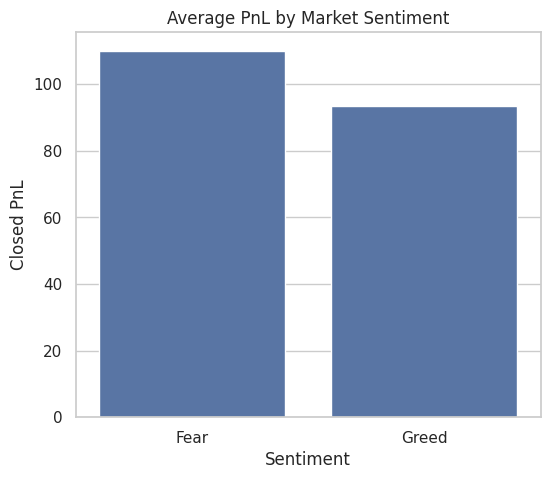

In [58]:
avg_pnl = merged.groupby("Sentiment")["Closed PnL"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="Sentiment", y="Closed PnL", data=avg_pnl)
plt.title("Average PnL by Market Sentiment")
plt.savefig("ds_thrinesh/outputs/avg_pnl.png")
plt.show()



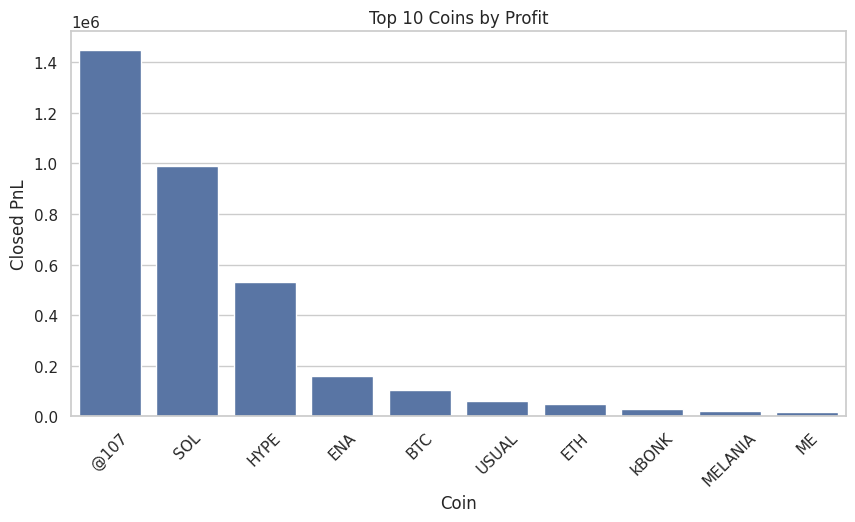

In [59]:
top_coins = coin_profit.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x="Coin", y="Closed PnL", data=top_coins)
plt.xticks(rotation=45)
plt.title("Top 10 Coins by Profit")
plt.savefig("ds_thrinesh/outputs/top_coins.png")
plt.show()

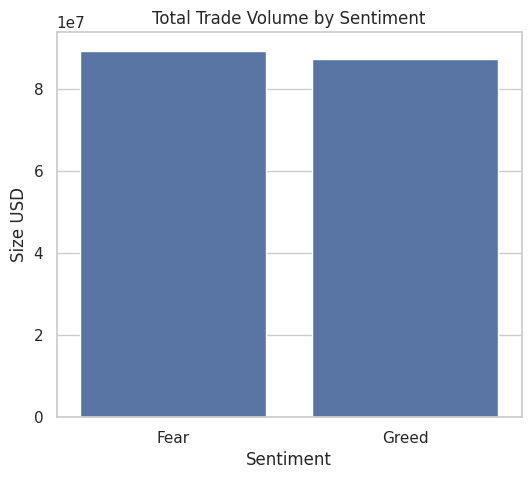

In [60]:
volume = merged.groupby("Sentiment")["Size USD"].sum().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="Sentiment", y="Size USD", data=volume)
plt.title("Total Trade Volume by Sentiment")
plt.savefig("ds_thrinesh/outputs/total_volume.png")
plt.show()


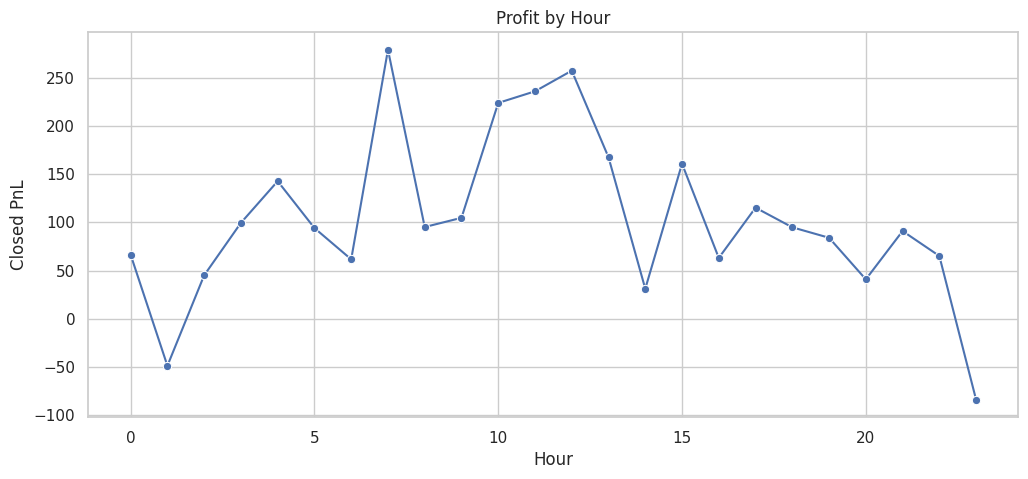

In [61]:
merged['Hour'] = merged['Timestamp IST'].dt.hour

hourly_profit = merged.groupby('Hour')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(x="Hour", y="Closed PnL", data=hourly_profit, marker='o')
plt.title("Profit by Hour")
plt.savefig("ds_thrinesh/outputs/hourly_profit.png")
plt.show()

hourly_profit.to_csv("ds_thrinesh/csv_files/hourly_profit.csv", index=False)


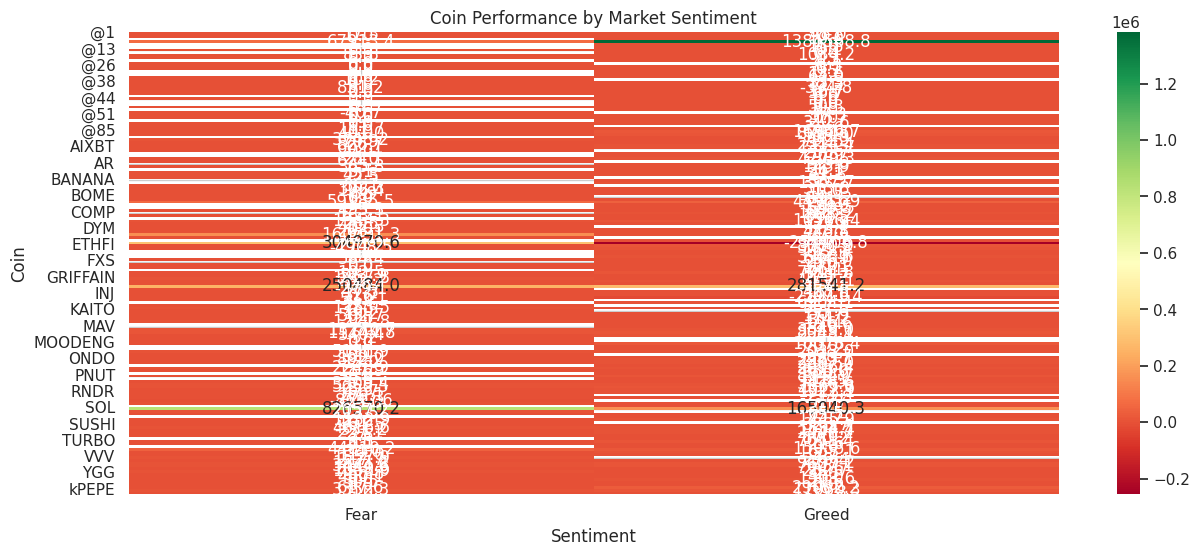

In [62]:
coin_sentiment = merged.groupby(['Coin','Sentiment'])['Closed PnL'].sum().reset_index()

pivot = coin_sentiment.pivot(index="Coin", columns="Sentiment", values="Closed PnL")

plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title("Coin Performance by Market Sentiment")
plt.savefig("ds_thrinesh/outputs/coin_sentiment_heatmap.png")
plt.show()

pivot.to_csv("ds_thrinesh/csv_files/coin_sentiment_analysis.csv")

